<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: Arina Lopukhova (@erynn). Edited by [Yury Kashnitskiy](https://yorko.github.io) (@yorko) and Vadim Shestopalov (@vchulski). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

## <center>Разведывательный анализ данных в Pandas (история олимпийских игр)
    
    
Загружаем файл https://drive.google.com/file/d/1f5v6Z2ayc7h698FG_98wP5x1Y2zZQeox/view?usp=sharing (scraped by rgriffin from www.sports-reference.com). 
Данные содержат следующие признаки:

* ID - Unique number for each athlete
* Name - Athlete's name
* Sex - M or F
* Age - Integer
* Height - In centimeters
* Weight - In kilograms
* Team - Team name
* NOC - National Olympic Committee 3-letter code
* Games - Year and season
* Year - Integer
* Season - Summer or Winter
* City - Host city
* Sport - Sport
* Event - Event
* Medal - Gold, Silver, Bronze, or NA


In [124]:
import pandas as pd
% matplotlib inline

In [2]:
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


*Hint:* возможно, в некоторых случаях нужно избавиться от дубликатов, чтобы учитывать одного атлета только один раз. Ниже пример как это сделать. Например, удалим все дубликаты атлетов.


In [3]:
display(data.shape[0])
display(data.drop_duplicates('Name').shape[0])

271116

134732

Можно удалять полные дубликаты, а можно дубликаты по нескольким колонкам (например, удалять не все дубликаты атлетов, а оставлять одно упоминание атлета для каждых игр)

In [25]:
display(data.shape[0]) # всего атлетов
display(data.drop_duplicates(['Name', 'Games']).shape[0]) # всего атлетов, если не учитывать записи с одинаковым именем для одинаковых игр
display(data.drop_duplicates(['Name', 'Age', 'Height']).shape[0]) # всего атлетов, если не учитывать дубликаты по имени, росту и возрасту


271116

187297

187059

Обратите внимание, что данный метод не перезаписывает данные, поэтому, чтобы сохранить измененный датафрейм, нужно записать его в переменную.

**1. Сколько лет было самым молодым участникам (мужчина и женщина) олимпийских игр в 1992 году?**


In [10]:
data[(data['Year'] == 1992) & (data['Sex'] == 'M')]['Age'].min()

11.0

In [11]:
data[(data['Year'] == 1992) & (data['Sex'] == 'F')]['Age'].min()

12.0

__2. Какую пропорцию составляют мужчины-баскетболисты среди всех участников игр 2012 года. Округлите ответ до двух знаков.__



In [29]:
# You code here
all_athletes = len(data[(data['Year'] == 2012)].drop_duplicates(['Name', 'Age', 'Height']))

In [16]:
for x in data['Event'].unique():
    if 'basketball' in x.lower():
        print(x)

Basketball Men's Basketball
Basketball Women's Basketball


In [30]:
basket_athletes = len(data[(data['Year'] == 2012) & (data['Event'] == "Basketball Men's Basketball")].drop_duplicates(['Name', 'Age', 'Height']))

In [31]:
round(basket_athletes/all_athletes, 2)

0.01

__3. Найдите среднее и стандартное отклонение для роста теннисисток (большой теннис), которые участвовали в играх 2000 года. Округлите ответ до второго знака.__


In [49]:
data[(data['Event'].str.startswith("Tennis")) & (data['Year'] == 2000) & (data['Sex'] == 'F')]['Height'].mean()

171.792

In [50]:
data[(data['Event'].str.startswith("Tennis")) & (data['Year'] == 2000) & (data['Sex'] == 'F')]['Height'].std()

6.4586725890776675

__4. Выведите названия всех уникальных дисциплин, связанных с катанием на коньках (Skating). Посчитайте их количество__ 

In [39]:
data[data['Event'].str.contains("Skating")]['Event'].unique()

array(["Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Speed Skating Men's 500 metres",
       "Speed Skating Men's 1,500 metres",
       "Speed Skating Men's 5,000 metres",
       "Speed Skating Men's 10,000 metres",
       "Figure Skating Men's Singles", 'Figure Skating Mixed Team',
       'Figure Skating Mixed Pairs', "Speed Skating Women's 1,500 metres",
       "Speed Skating Women's Team Pursuit (6 laps)",
       "Figure Skating Women's Singles",
       "Speed Skating Men's 1,000 metres",
       'Figure Skating Mixed Ice Dancing',
       "Short Track Speed Skating Men's 5,000 metres Relay",
       "Speed Skating Women's 3,000 metres",
       "Short Track Speed Skating Women's 3,000 metres Relay",
       "Short Track Speed Skating Men's 500 metres",
       "Short Track Speed Skating Men's 1,000 metres",
       "Short Track Speed Skating Men's 1,500 metres",
       "Speed Skating Men's Team Pursuit (8 laps)",
       "Speed Skating Women's 5,0

In [40]:
len(data[data['Event'].str.contains("Skating")]['Event'].unique())

27

__5. Найдите самую легкую атлетку игр 2006 года. В каком виде спорта она участвовала?__


In [57]:
data[(data['Year'] == 2006) & (data['Weight'] == data[(data['Year'] == 2006) & (data['Sex'] == 'F')]['Weight'].min())]['Event']

188177    Figure Skating Mixed Pairs
Name: Event, dtype: object

__6. В скольких олимпиадах принимал участие John Aalberg?__

In [60]:
len(data[data['Name'] == 'John Aalberg']['Year'].unique())

2

__7. Сколько золотых медалей настольном теннисе выиграл Китай на Олимпиаде в 2008 году?__

In [67]:
len(data[(data['Event'].str.contains("Table")) & (data['Year'] == 2008) & (data['Team'] == 'China') & (data['Medal'] == 'Gold')])

8

__8. Правда ли, что Испания выиграла меньше медалей чем Италия на играх 2016 года? Ну учитывайте NaN в колонке _Medal_.__


In [80]:
len(data[(data['Team'] == 'Spain') & (data['Year'] == 2016)].dropna(subset = ['Medal'])) < len(data[(data['Team'] == 'Italy') & (data['Year'] == 2016)].dropna(subset = ['Medal']))

True

__9. Найдите самую многочисленную и самую малочисленную группу по возрасту среди всех участников игр (разбейте возраст по 10 лет).__


In [83]:
data['Age'].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [84]:
data['Age_bins'] = pd.cut(data['Age'], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [85]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_bins
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,"(20, 30]"
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,"(20, 30]"
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,"(20, 30]"
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,"(30, 40]"
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,"(20, 30]"


In [90]:
data['Age_bins'].value_counts().max()

171974

In [98]:
data['Age_bins'].value_counts().head(1)

(20, 30]    171974
Name: Age_bins, dtype: int64

__10. Проводились ли летние олимпийские игры в Atlanta? А зимние в Squaw Valley? Верните True или False/

In [102]:
if 'Summer' in data[data['City'] == 'Atlanta']['Season'].unique():
    print(True)

True


In [103]:
if 'Winter' in data[data['City'] == 'Squaw Valley']['Season'].unique():
    print(True)

True


__11. Найдите абсолютную разницу между количеством уникальных видов спорта на играх в 1988 году и в 2002__

In [117]:
abs(len(data[data['Year'] == 1988]['Sport'].unique()) - len(data[data['Year'] == 2002]['Sport'].unique()))

22

__12. Найдите, в каких годах проводились соревнования по керлингу__ 

In [120]:
data[(data['Event'].str.contains("Curling"))]['Year'].unique()

array([2006, 2014, 1924, 1998, 2010, 2002], dtype=int64)

__13. Постройте распределение возраста керлингистов, участвовавших в олимпиаде в Sochi__ 

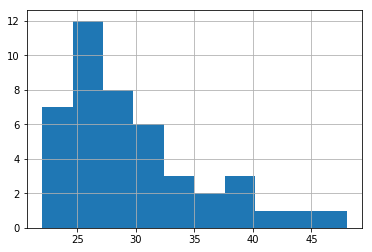

In [125]:
data[(data['Event'].str.contains("Curling")) & (data['Sex'] == 'M') & (data['City'] == 'Sochi')]['Age'].hist()

__14. Выведите бар-чарт для медалей (золотые, серебряные и бронзовые) для Australia за всю историю зимних олипиад__ 

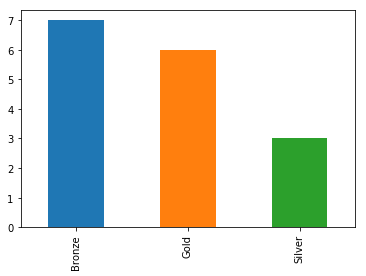

In [133]:
data[(data['Team'] == 'Australia') & (data['Season'] == 'Winter') & (data['Medal'].notna())]['Medal'].value_counts().plot(kind = 'bar')

__15. Выведете всех уникальных спортсменов с фамилией Belov и посчитайте их количество. Заодно обратите внимание, как обозначен в данных СССР.__

In [146]:
data[data['Name'].str.contains('Belov')].drop_duplicates(['Name', 'Height', 'Weight'])[data['Sex'] == 'M']

C:\Users\rogov\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_bins
18470,9779,Aleksandr Aleksandrovich Belov,M,20.0,200.0,100.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Gold,"(10, 20]"
18472,9780,Aleksandr Belov,M,20.0,182.0,60.0,Russia,RUS,2002 Winter,2002,Winter,Salt Lake City,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN,"(10, 20]"
18474,9781,Anton Sergeyevich Belov,M,27.0,192.0,92.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN,"(20, 30]"
18475,9782,Nikolay Grigoryevich Belov,M,32.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze,"(30, 40]"
18476,9783,Sergey Aleksandrovich Belov,M,24.0,190.0,82.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Basketball,Basketball Men's Basketball,Bronze,"(20, 30]"
18480,9784,Vladimir Borisovich Belov,M,22.0,195.0,92.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Handball,Handball Men's Handball,Silver,"(20, 30]"
18481,9785,Yevgeny Nikolayevich Belov,M,23.0,185.0,78.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN,"(20, 30]"
18483,9786,Yury Vladimirovich Belov,M,23.0,183.0,120.0,Belarus,BLR,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's Shot Put,NaN,"(20, 30]"


In [147]:
len(data[data['Name'].str.contains('Belov')].drop_duplicates(['Name', 'Height', 'Weight'])[data['Sex'] == 'M'])

C:\Users\rogov\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


8

__16. Постройте тренд общего количества медалей по годам на летних играх за всю историю участия СССР.__

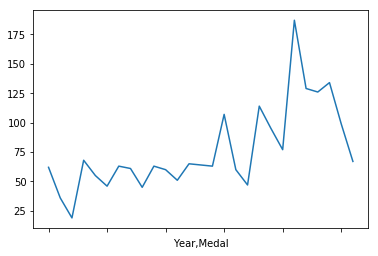

In [181]:
data[(data['NOC'] == 'URS') & (data['Season'] == 'Summer')].groupby('Year')['Medal'].value_counts().plot()

__17. Какая страна завоевала больше всех медалей в Figure Skating за всю историю.__

In [164]:
data[data['Event'].str.contains('Figure Skating')].groupby('Medal')['NOC'].value_counts()['Gold']

NOC
RUS    32
URS    20
USA    16
AUT     9
CAN     7
GER     7
FRA     6
GBR     6
EUN     5
SWE     5
GDR     3
NOR     3
BEL     2
CHN     2
FIN     2
JPN     2
KOR     1
NED     1
TCH     1
UKR     1
Name: NOC, dtype: int64

__18. Выведите количество уникальных дисциплин, которые проводятся только среди мужчин, среди женщин и смешанные дисциплины (Mixed).__

In [155]:
len(data[data['Event'].str.contains('Men')]['Event'].unique())

464

In [156]:
len(data[data['Event'].str.contains('Mixed')]['Event'].unique())

91

__19. Выведете средний вес атлетов и атлеток, участвующих в соревнованиях по гимнастике (Gymnastics), но не учитывая художественную гимнастику (Rhythmic Gymnastics). Не учитывайте одних и тех же атлетов два раза.__

In [201]:
data[data['Sport'].str.startswith('Gymnastics') & (data['Sex'] == 'M')].drop_duplicates(['Name', 'Height', 'Weight'])['Weight'].mean()

63.29665071770335

In [202]:
data[data['Sport'].str.startswith('Gymnastics') & (data['Sex'] == 'F')].drop_duplicates(['Name', 'Height', 'Weight'])['Weight'].mean()

47.2570796460177

__20. Выберите любой город, в котором проводилась олимпиада. Проверьте, выиграла ли принимающая страна больше всего медалей на этих играх. Выведите True или False__

In [191]:
data[data['City'] == 'Moskva'].groupby('NOC')['Medal'].size()['URS'] >= data[data['City'] == 'Moskva'].groupby('NOC')['Medal'].size().max()

True